In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
import seaborn as sns
from scipy import stats
from scipy.stats import norm


In [72]:
data = pd.read_csv('data.csv')
print(data.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  


In [73]:
data.columns[data.isnull().any()]

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'LSTAT'], dtype='object')

In [74]:
miss = data.isnull().sum()/len(data)
miss = miss[miss>0]
miss.sort_values(inplace=True)
miss

CRIM     0.039526
ZN       0.039526
INDUS    0.039526
CHAS     0.039526
AGE      0.039526
LSTAT    0.039526
dtype: float64

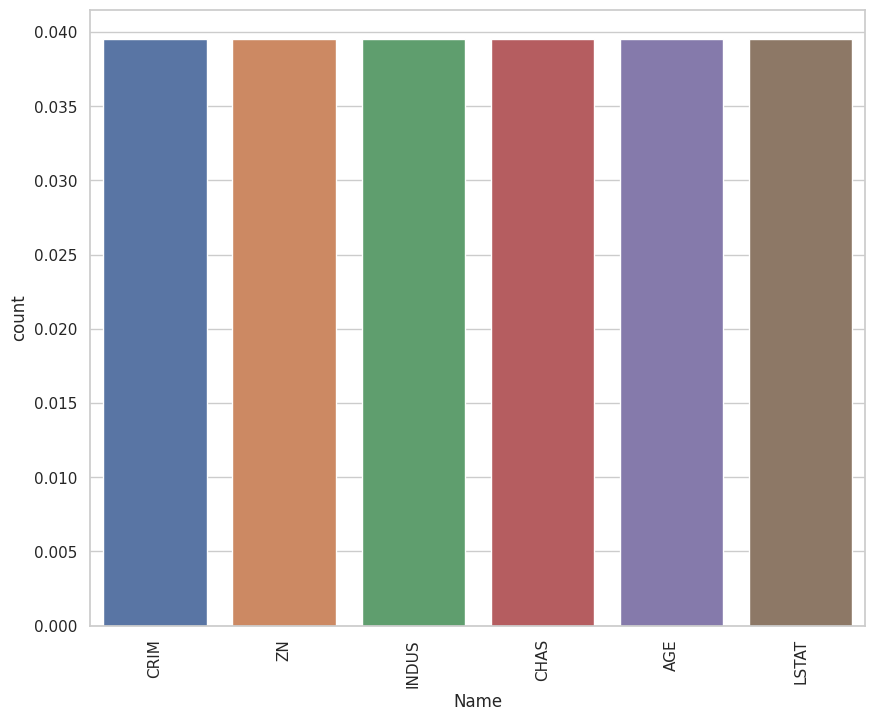

In [75]:
# visualising missing values
miss = miss.to_frame()
miss.columns = ['count']
miss.index.names = ['Name']
miss['Name'] = miss.index

# plot the mising value count
sns.set(style="whitegrid", color_codes = True)
sns.barplot(x='Name', y = 'count', data=miss)
plt.xticks(rotation = 90)
plt.show()

/tmp/ipykernel_54573/2380524325.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['MEDV'])


<Axes: xlabel='MEDV', ylabel='Density'>

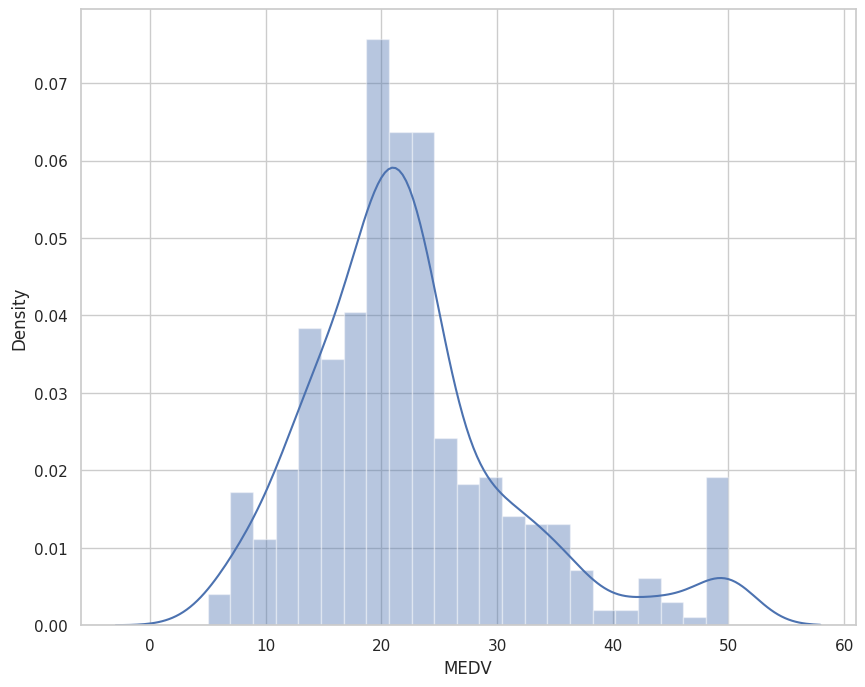

In [76]:
sns.distplot(data['MEDV'])

<Axes: >

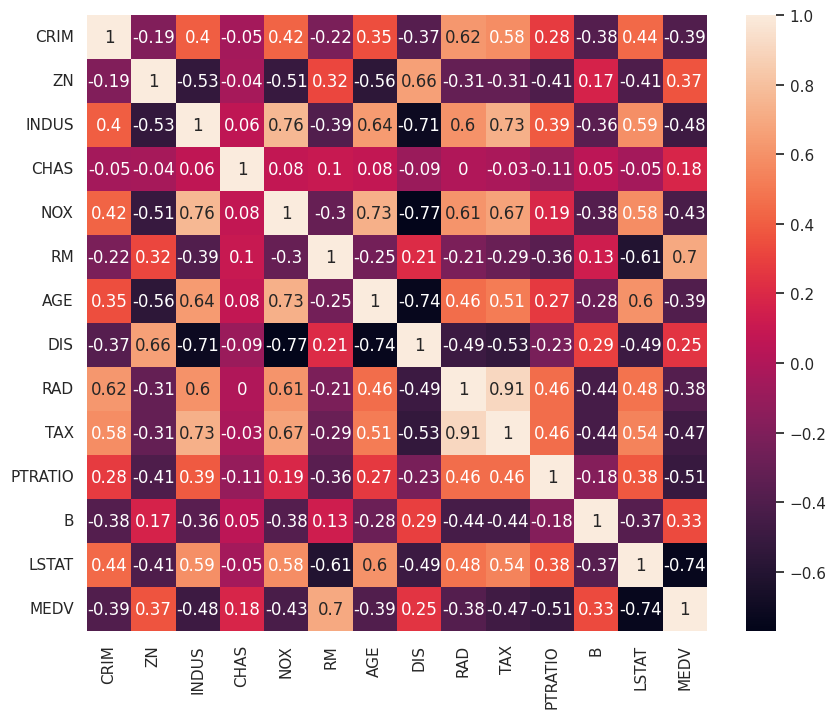

In [77]:
correlation_matrix=data.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

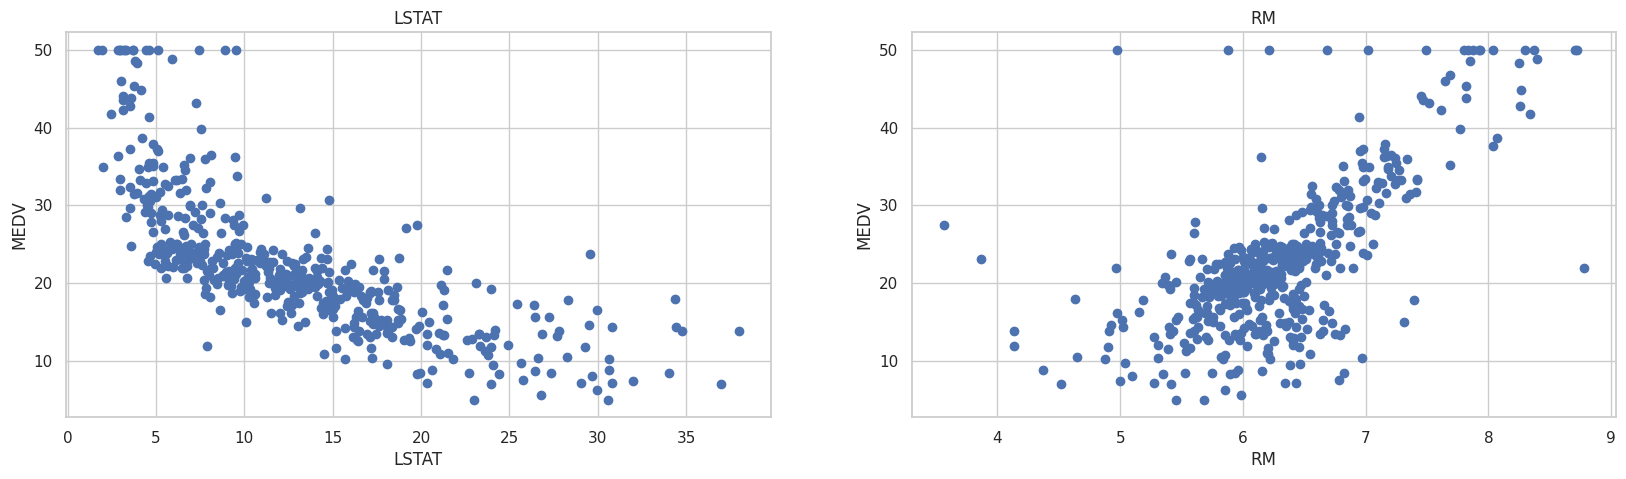

In [78]:
plt.figure(figsize=(20,5))

features = [ 'LSTAT', 'RM' ]
target = data['MEDV']


for i, col in enumerate(features):
    plt.subplot(1, len(features), i+1)
    x = data[col]
    y = target
    plt.scatter(x,y,marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [79]:
# feature normalization
def featureNormalize(x):
    mu = np.mean(x, axis = 0) # define the mean
    sigma = np.std(x, ddof = 1, axis = 0) # define the standard deviation
    x_norm = (x - mu) / sigma # scaling function
    return x_norm, mu, sigma

x = pd.DataFrame(np.c_[data['LSTAT'], data['RM']], columns= ['LSTAT','RM'])
x = x.fillna(x.mean()).values
x_train, mu, sigma = featureNormalize(x)
x_train = np.hstack((np.ones((x_train.shape[0], 1)), x_train))

In [80]:
def computeCostMulti(x, y, theta):
    h = np.dot(x, theta) - y
    h 
    j = np.dot(h, h) / (2*x.shape[0])
    return j
  


In [81]:

def gradientDescentMulti(x, y, theta, alpha, num_iters):
    J_history = np.zeros(num_iters)
    for i in range(num_iters):
        theta = (theta - (alpha / x.shape[0])*np.dot(x.T, (np.dot(x, theta) - y)))
        J_history[i] = computeCostMulti(x, y, theta)
    return theta, J_history

In [82]:
theta = np.zeros(3)
alpha = 0.01
num_iters = 400
theta, J_history = gradientDescentMulti(x_train, y, theta, alpha, num_iters)
print(theta)

[22.12832998 -4.30488488  3.81432788]


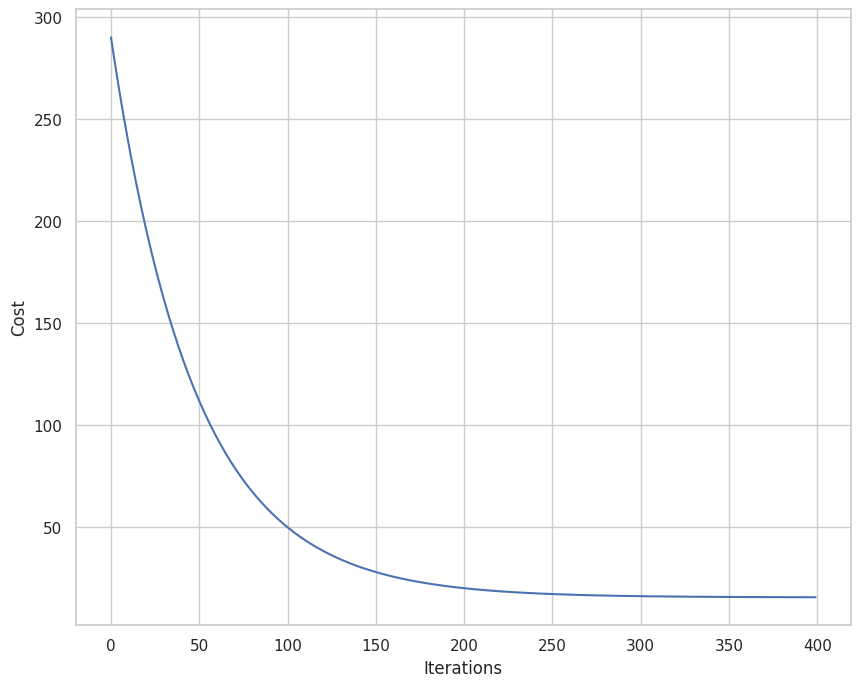

In [83]:
plt.figure()
plt.plot(np.arange(num_iters), J_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

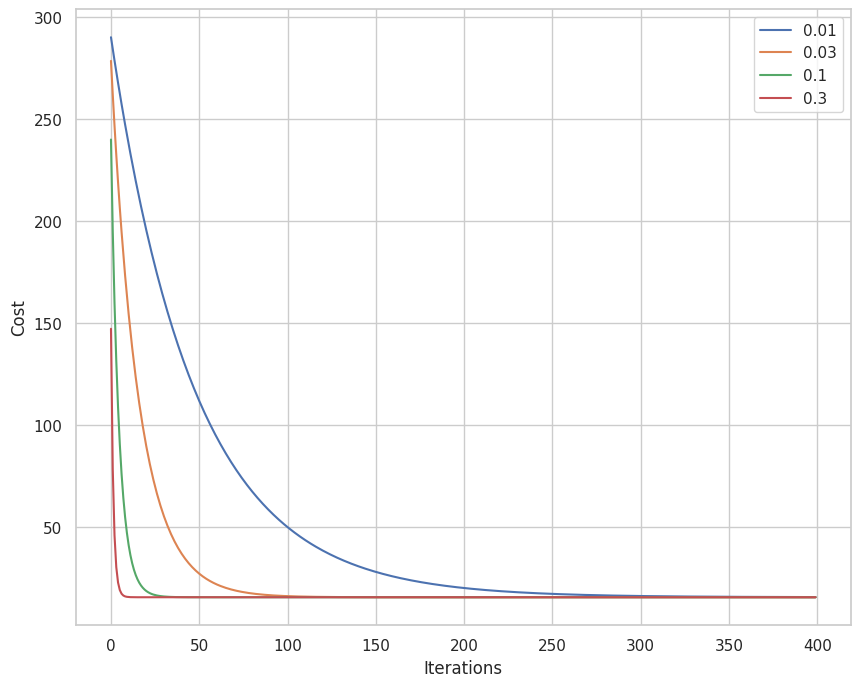

In [84]:
# different learning rates
alphas = [0.01, 0.03, 0.1, 0.3]
plt.figure()
for alpha in alphas:
    theta = np.zeros(3)
    num_iters = 400
    theta, J_history = gradientDescentMulti(x_train, y, theta, alpha, num_iters)
    plt.plot(np.arange(num_iters), J_history, label = str(alpha))
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.show()
    

In [85]:
X = pd.DataFrame(np.c_[data['LSTAT'], data['RM']], columns = ['LSTAT','RM'])
Y = data['MEDV']

In [86]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_model = LinearRegression()
lin_model.fit(x_train.fillna(x_train.mean()), y_train)

LinearRegression()

In [88]:
# model evaluation for training set
y_train_predict = lin_model.predict(x_train.fillna(x_train.mean()))
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print("The model performance for training set")
print('--------------------------------------')
print('Slope: ', lin_model.coef_)
print('Intercept: ', lin_model.intercept_)
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print('\n')

# model evaluation for testing set
y_test_predict = lin_model.predict(x_test.fillna(x_test.mean()))
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

print("The model performance for testing set")
print('-------------------------------------')
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
Slope:  [-0.70167073  4.80344601]
Intercept:  1.2142493733380881
RMSE is 5.741584647816867
R2 score is 0.6162381512593651


The model performance for testing set
-------------------------------------
RMSE is 5.15444139429562
R2 score is 0.6606596847633623


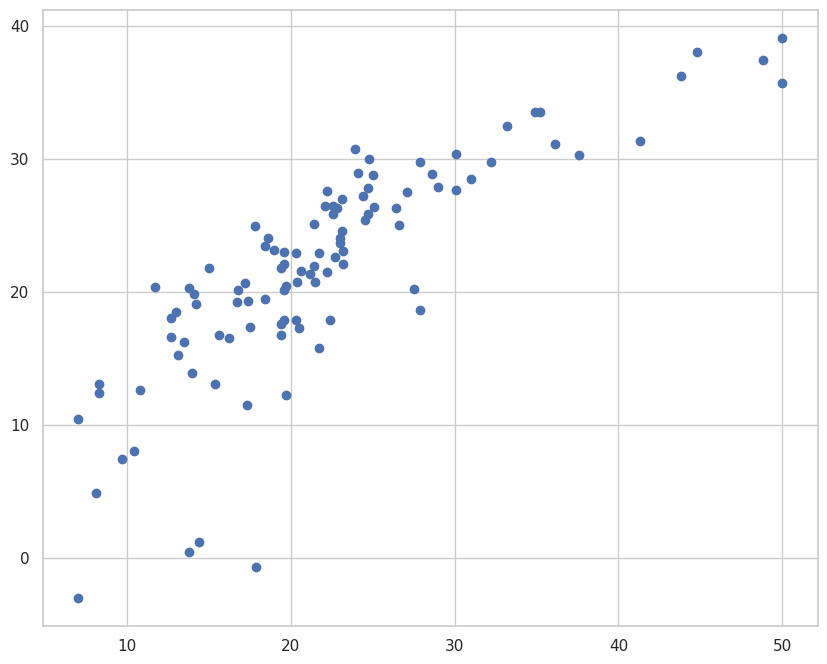

In [89]:
# plotting the y_test vs y_pred
# ideally should have been a straight line
plt.scatter(y_test, y_test_predict)
plt.show()


plt.figure()
plt.plot(np)